# Régression Linéaire et Logistique

## Le but de la régression ?
Imaginons qu'on ait un ensemble d'observations $\{ \forall n : (y_n, x_{n,1}, x_{n,2}, ... , x_{n,K}) \}$:
- ou pour simplifier un tableau avec les colonnes $(y,x_1,x_2,...,x_K)$

La régression a pour but de synthétiser et prédire une variable (dépendante) $y$ sur base des variables (indépendantes) $X = (x_1,x_2,..., x_K)$:
- $ y \approx \hat{y} = f(X) = f(x_1,x_2,...,x_K)$  
Il faut noter que souvent, on n'a pas un matching/fitting parfait et il faut se contenter d'une approximation (maitrisée) $\hat{y}$ de la vraie variable observée $y$.
- Alternativement, on exprime cette relation en tenant compte de fluctuation statistique/bruit $\epsilon$:
    - $ y = f(X) + \epsilon $ 

La formule exacte de la fonction $f(\cdot)$ est determiné par 2 choses :
- le template de fonction = la catégorie/type de fonction: ceci est imposé par le scientifique/analyste/ingénieur/développeur, car cela dépend du contexte/signification du problème 
- les paramètres associés à ce template: ceux-ci sont déterminés avec les données.


Exemple:
- on souhaite prédire le prix d'une maison $y$, en se basant sur la surface habitable $x_1$, le PEB du batiment $x_2$, et la surface du jardin $x_3$. 


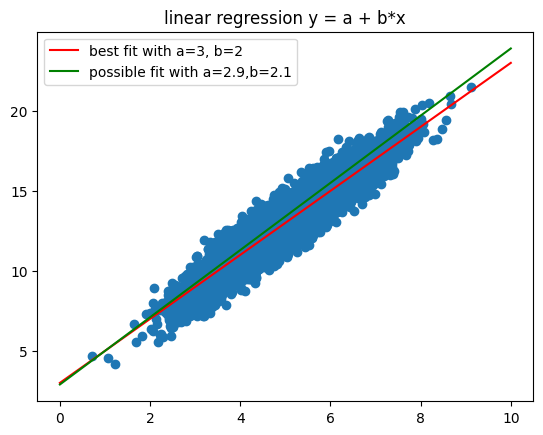

In [4]:
### EXEMPLE 01

import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg


N = 10_000                                  ## nombre de points
X = np.random.normal(0,1,(N)) + 5           ## X suit une normale
Y = 3+2*X + 0.75*np.random.normal(0,1,(N))  ## Y est fortement corrélé avec X
                                            ## Y = 3 + 2*X + \epsilon

def y_hat(x, a = 0, b = 1):
    ### fonction linéaire
    return a+b*x 
x_theorique = np.linspace(0,10,1001)

plt.title("linear regression y = a + b*x")
plt.scatter(X,Y)
### ici, je sais que les valeurs optimales sont (a=3,b=2), mais je sais le "decouvrir" avec les methodes de fitting
plt.plot(x_theorique,y_hat(x_theorique,a=3  ,b=2  ), c= 'red',label ="best fit with a=3, b=2")
plt.plot(x_theorique,y_hat(x_theorique,a=2.9,b=2.1), c="green",label ="possible fit with a=2.9,b=2.1")
plt.legend()
plt.show()

## la régression linéaire simple
- $\hat{y} = f(X) = a + bx$
- le template de la régression est une fonction linéaire (=simple proportion) et ne dépend que d'une seule variable
- les paramètres de cette fonction/template sont les coefficients $a,b$
- les données sont les paires $\{(y_n,x_n)\}$

Pour que la régression linéare soit approprié, il faut que:
- les coefficients soit (vraiment) constants (sinon pas linéaire)
- l'erreur $\epsilon$ suit une distribution normale centrée à $0$ avec variance $\sigma^2$: $\epsilon \sim N(0,\sigma^2)$
- (la variance de) l'erreur est indépendant des $X$ (= [homoscédasticité](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity))




## fitting et critère de qualité:
L'idée c'est qu'il faut déterminer les valeurs de $a$ et $b$, de telle manière que la fonction "colle" le mieux aux données $\{(y_n,x_n)\}$:
- on veut que l'écart global $|y - \hat{y}|$ est plus petit possible.
- c'est un problème d'optimisation
- "[Ajustement de courbe](https://en.wikipedia.org/wiki/Curve_fitting)" (=EN: fitting)


Il existe plusieurs métriques qui quantifient cette proximité à la réalité (=manières de compter les erreurs):
- il y a deux **idées de métriques** (toutes les deux applicable aux régressions et classification):
    - les **"fonction de perte"**, "fonction de coût", "fonction d'erreur" (EN: loss function, cost function, error function): on souhaite minimiser la fonction de perte 
    - les **"scores"** (EN: scores): on souhaite maximiser le score 


Dans les problèmes de **régression**:
- On veut prédire une valeur qui est plus ou moins proche de la vraie valeur.
- Plus on s'éloigne, plus le modèle est mauvais.
- Il y a une notion de distance/proximité qui détermine la qualité du modèle.


Ceci est à mettre en contraste avec des problèmes de **classification**: 
- On a soit prédit la bonne catégorie, soit une mauvaise.
- Il n'y a pas vraiment de notion de distance.

Attention: comme les problèmes de régressions et de classifications sont différents, les scores et/ou fonction pertes qu'on utilise pour les uns n'est pas approprié pour les autres !


Ici, il s'agit de régression.
Une fonction de coût, parmi les plus importantes dans la régression, c'est l'erreur quadratique moyen (EN: mean square error):  
- $ MSE = \frac{\sum_n |y_n - \hat{y}_n|^2}{N}  = \frac{\sum_n |y_n - a - b x_n|^2}{N}$ 

In [5]:
def mse_function(Y_true, Y_pred):
    return np.mean((Y_true-Y_pred)*(Y_true - Y_pred))

### methode force brut:
- recherche en grille
- EN: brute force, grid search
- la methode la plus simple (mais pas le plus efficace), c'est d'évaluer un ensemble de valeurs possibles pour les coefficients $a,b$.

pour l'exemple 01:
- on essaye toutes les combinaisons imaginable pour
    - $a \in (-5,-4.9,...,4.9,5)$
    - $b \in (-5,-4.9,...,4.9,5)$
- pour chaque combinaison, on détermine le "MSE"
- on prends la combinaison qui nous donne la plus faible valeur du "MSE"

Le problème de ce genre de recherche de paramètres:
- imaginons qu'on veut tester 100 valeurs par paramètre
- imaginons qu'on a un nombre de dimension élevé (= beaucoup de colonnes) et/ou un modèle complexe/lourd (= beaucoup de paramètres)
    - $M$ nombre de parametres
- pour faire une recherche exaustive,il faudra faire $100^M$ evaluations
    - exemple: avec un modèle qui a 10 paramètres il y a $100\,000\,000\,000\,000\,000\,000 = 100\,000\,000\text{T}$ (terra) d'evaluations
        - c'est beaucoup trop !

In [6]:
lst_a = [x/10 for x in range(-50,51)]
lst_b = [x/10 for x in range(-50,51)]

dict_mse = {}

for a in lst_a:
    for b in lst_b:
        Y_hat_a_b = y_hat(X,a=a,b=b)
        mse = mse_function(Y_true=Y , Y_pred=Y_hat_a_b)
        dict_mse[mse] = (a,b) ### potentiellement, on écrase la paire (a,b) existant pour un même mse


best_mse = np.min(list(dict_mse.keys()))

print(best_mse,dict_mse[best_mse])

0.5636799678058515 (3.0, 2.0)


In [7]:
def better_brute_force(lst_a: list or tuple or np.array
                       ,lst_b:list or tuple or np.array
                       ,y_hat:callable
                       ,X:np.array
                       ,Y:np.array
                      )->tuple:

    dict_mse = {}
    for a in lst_a:
        for b in lst_b:
            Y_hat_a_b = y_hat(X,a=a,b=b)
            mse = mse_function(Y_true=Y, Y_pred=Y_hat_a_b)
            if mse in dict_mse.keys():
                dict_mse[mse].append({"a":a,"b":b})
            else:
                dict_mse[mse] = [{"a":a,"b":b}]

    best_mse = np.min(list(dict_mse.keys()))
    
    
    return (best_mse,dict_mse[best_mse])

print(better_brute_force(lst_a=lst_a
                         ,lst_b=lst_b
                         ,y_hat=y_hat
                         ,X=X
                         ,Y=Y
                        ))

(0.5636799678058515, [{'a': 3.0, 'b': 2.0}])


### methode "steepest hill-climbing" 
- methode "escalade"
- EN: steepest hill-climbing method

- l'idée s'est
    - d'évaluer autour d'un point, un ensemble de directions;
    - ensuite prendre la direction avec le meilleur résultat comme nouveau point;
    - repeter ces étapes jusqu'à obtenir un maximum/minimum ou un plateau

- NOTE: comme on evalue pas toutes les options, on peut potentiellement ne pas trouver le min/max global, mais seulement le min/max local(= pas une optimisation parfaite). Cependent, comme on fait moins de calculs, on met moins de temps à obtenir un résultat. 

In [8]:
### (cet algo peut être optimisé)

def steepest_hill(X:np.array
                  ,Y:np.array
                  ,y_hat:callable = y_hat
                  ,init_point:dict = {"a":4,"b":1}
                  ,delta:dict = {"a":0.1,"b":0.1}
                  ,MAX_COUNTER = 10_000
                 )->list:
    prev_point = init_point.copy()
    
    prev_point["mse"] = mse_function(Y_true=Y, Y_pred=y_hat(x=X,a=init_point["a"],b=init_point["b"]))
    best_points = []
    COUNTER = 0
    
    while (prev_point not in best_points): 
        a_nexts = (prev_point["a"] - delta["a"], prev_point["a"] + delta["a"], prev_point["a"])
        b_nexts = (prev_point["b"] - delta["b"], prev_point["b"] + delta["b"], prev_point["b"])
        neighbours = [{"a":a, "b":b} for a in a_nexts for b in b_nexts][:-1]    
        ## contruire toutes les combinaisons possibles de voisin, sans le point actuel 
                                                                                
        MSE = []
        for n in neighbours:
            mse = mse_function(Y_true=Y, Y_pred=y_hat(x=X,a= n["a"] , b = n["b"]))
            MSE.append(mse)
        
        best_point_pos = np.argmin(MSE)
        best_point = neighbours[best_point_pos]
        best_point["mse"]=MSE[best_point_pos]
        
        best_points.append(prev_point)
        
        if prev_point["mse"] > best_point["mse"]:
            prev_point = best_point
            COUNTER +=1
            if COUNTER >= MAX_COUNTER:
                break
        else:
            break
        
    #print(COUNTER)
    return best_points 

In [9]:
steepest_hill(X=X, Y=Y, y_hat=y_hat,init_point={"a":4,"b":3.5}) ## on arrive à un min LOCAL

[{'a': 4, 'b': 3.5, 'mse': 74.89972753630995},
 {'a': 3.9, 'b': 3.4, 'mse': 64.8041214839267},
 {'a': 3.8, 'b': 3.3, 'mse': 55.44503808886976},
 {'a': 3.6999999999999997, 'b': 3.1999999999999997, 'mse': 46.82247735113899},
 {'a': 3.5999999999999996, 'b': 3.0999999999999996, 'mse': 38.93643927073446},
 {'a': 3.4999999999999996, 'b': 2.9999999999999996, 'mse': 31.786923847656162},
 {'a': 3.3999999999999995, 'b': 2.8999999999999995, 'mse': 25.37393108190408},
 {'a': 3.2999999999999994, 'b': 2.7999999999999994, 'mse': 19.697460973478233},
 {'a': 3.1999999999999993, 'b': 2.6999999999999993, 'mse': 14.757513522378606},
 {'a': 3.099999999999999, 'b': 2.599999999999999, 'mse': 10.554088728605203},
 {'a': 2.999999999999999, 'b': 2.499999999999999, 'mse': 7.087186592158032},
 {'a': 2.899999999999999, 'b': 2.399999999999999, 'mse': 4.3568071130370845},
 {'a': 2.799999999999999, 'b': 2.299999999999999, 'mse': 2.362950291242364},
 {'a': 2.699999999999999, 'b': 2.199999999999999, 'mse': 1.1056161267

In [10]:
 steepest_hill(X=X, 
               Y=Y, 
               y_hat=y_hat,
               init_point={"a":3.4,"b":2.3}
               , delta={"a":0.05,"b":0.05}
              ) ## on arrive à un min GLOBAL

[{'a': 3.4, 'b': 2.3, 'mse': 4.294085909058343},
 {'a': 3.35, 'b': 2.25, 'mse': 3.2141303979537166},
 {'a': 3.3000000000000003, 'b': 2.2, 'mse': 2.318305551180647},
 {'a': 3.2500000000000004, 'b': 2.1500000000000004, 'mse': 1.6066113687391304},
 {'a': 3.2000000000000006, 'b': 2.1000000000000005, 'mse': 1.0790478506291705},
 {'a': 3.150000000000001, 'b': 2.0500000000000007, 'mse': 0.7356149968507638},
 {'a': 3.100000000000001, 'b': 2.000000000000001, 'mse': 0.5763128074039131},
 {'a': 3.050000000000001, 'b': 2.000000000000001, 'mse': 0.5674963876048823},
 {'a': 3.0000000000000013, 'b': 2.000000000000001, 'mse': 0.5636799678058517}]

### [déscente de gradients](https://en.wikipedia.org/wiki/Gradient_descent)
- EN: gradient descent
- prérequis:
    - dérivés & gradients de fonction
        - la tangente/pente de la fonction 
    
    - fonction convexe
        - fonction qui a une dérivée de deuxième degrée qui est positif ou nul sur tout son domaine
- on se déplace en fonction de la pente du gradient/derivée, plutot qu'avec un interval fixe

Idée de l'algo:
- On se met à la place de la machine
- On est une personne aveugle et sourde dans une valée et on souhaite rejoindre le lac (ou une rivière)
    - la machine est aveugle et sourde:
        - on peut mesurer les chose que très localement; la machine doit calculer pour savoir, il n'y a pas d'autres possibilités
- La fonction qui fait la valée c'est la "fonction de perte/coût"
- À chaque point (ou nouveau déplacement) on peut sentir la pente (=calculer le gradient)
- Dans une valée convexe, plus on s'éloigne du minimum, plus la pente est élevé (*). Et inversement: quand on est proche du minimum, la pente est plus douce.
- Donc, quand une pente est élevée, il vaut mieux parcourir plus de distance avant de calculer la pente suivante.
    - on peut décider si il faut avancer prudamment ou pas:
        - ceci est déterminé par un facteur 'lambda' $\lambda$ :
            - la vitesse d'apprentissage (EN: learning rate)
            - avec un $\lambda$ élevé, pour un même gradient, on parcours une plus longue distance 
- Après un certain nombre d'étape (ou quand on ne distingue plus de différence significatifs) on est proche du minimum
- À noter que quand on est au minimum (pour une fonction convexe), le gradient est éxactement égal à $0$

(*) Ce n'est pas tout à fait exacte et en réalité la situation est est plus complexe que cela, mais cela ne change pas la nature de l'algo employé.


En résumé:
- avec:
    - $C(a,b) = MSE(y,f(X,a,b)) = (\frac{1}{N}\sum_n^N (y_n - a - b x_n)^2)$
    - gradient $\vec{\nabla} C(a,b) = \frac{\partial C(a,b)}{\partial a} \vec{1}_a + \frac{\partial C(a,b)}{\partial b} \vec{1}_b = \begin{bmatrix}
        \frac{\partial C(a,b)}{\partial a}\\
        \frac{\partial C(a,b)}{\partial b}\end{bmatrix}$
        - $\frac{\partial C(a,b)}{\partial a} = - \frac{2}{N} \sum_n (y_n - a - b x_n) = \text{function}(a,b)$
        - $\frac{\partial C(a,b)}{\partial b} = - \frac{2}{N} \sum_n (y_n - a - b x_n)*x_n  = \text{function}(a,b)$
    <br><br>
- les nouveaux candidats $\hat{a}^{(m+1)},\hat{b}^{(m+1)}$ sont calculé sur base des anciens et des dérivées partielles/gradient:
    - $\hat{a}^{(m+1)} = \hat{a}^{(m)} - \lambda \frac{\partial C(a,b)}{\partial a}|_{(a=\hat{a}^{(m)},b=\hat{b}^{(m)})}$
    - $\hat{b}^{(m+1)} = \hat{b}^{(m)} - \lambda \frac{\partial C(a,b)}{\partial b}|_{(a= \hat{a}^{(m)},b= \hat{b}^{(m)})} $
    
    - ou avec une notation matricielle:
        -  $\begin{bmatrix}
        \hat{a}^{(m+1)}\\
        \hat{b}^{(m+1)}\end{bmatrix} = \hat{B}^{(m+1)} =  \hat{B}^{(m)} - \lambda \vec{\nabla} C(\hat{B}^{(m)})$




In [11]:
def partial_a(a,b,X,Y): ### pour régression linéaire simple
    N = len(X)
    res = -2/N * np.sum(Y - a - b*X)
    return res

def partial_b(a,b,X,Y): ### pour régression linéaire simple
    N = len(X)
    res = -2/N * np.sum((Y - a - b*X)*X)
    return res
gradient_vector = {"a":partial_a, "b":partial_b}


def gradient_descent(X
                     ,Y
                     ,gradient_vector
                     ,init_point={"a":3.4,"b":2.3}
                     ,learning_rate=0.01
                     ,epoch=100
                     , y_hat=y_hat ## pour voir le mse
                     , mse_function=mse_function ## pour voir le mse
                    ):

    
    lst_points = [init_point]
    prev_point = init_point
    for e in range(epoch):
        new_point = {}
        new_point["a"] = prev_point["a"] - learning_rate* gradient_vector["a"](a=prev_point["a"]
                                                                    ,b=prev_point["b"]
                                                                    ,X=X
                                                                    ,Y=Y
                                                                   )
        new_point["b"] = prev_point["b"] - learning_rate* gradient_vector["b"](a=prev_point["a"]
                                                                    ,b=prev_point["b"]
                                                                    ,X=X
                                                                    ,Y=Y
                                                                   )
        
        
        new_point["mse"] =mse_function(Y_true=Y, Y_pred=y_hat(x=X,a=new_point["a"],b=new_point["b"]))
        lst_points.append(new_point)
        prev_point = new_point
        
    

    return lst_points

In [12]:
gradient_descent(X=X,Y=Y,gradient_vector=gradient_vector,init_point={"a":4,"b":3},learning_rate=0.02,)

[{'a': 4, 'b': 3},
 {'a': 3.7599913676106542, 'b': 1.7640167812714413, 'mse': 0.7835648559777946},
 {'a': 3.7761395646388016, 'b': 1.8540179723666428, 'mse': 0.5896796021041646},
 {'a': 3.773688210381417, 'b': 1.8477293493778988, 'mse': 0.5885839371197135},
 {'a': 3.7725893777907946, 'b': 1.8484326743138668, 'mse': 0.5885051193709482},
 {'a': 3.771394197793577, 'b': 1.8486279015597917, 'mse': 0.5884318774224772},
 {'a': 3.7702078806621904, 'b': 1.848859664957025, 'mse': 0.5883588779346479},
 {'a': 3.7690227835751107, 'b': 1.849088415176127, 'mse': 0.5882860921599682},
 {'a': 3.7678394588055597, 'b': 1.8493170247109558, 'mse': 0.5882135193253542},
 {'a': 3.766657863524826, 'b': 1.8495452854949117, 'mse': 0.5881411588070566},
 {'a': 3.7654779981229, 'b': 1.8497732131627114, 'mse': 0.5880690099839271},
 {'a': 3.764299859855329, 'b': 1.8500008071037082, 'mse': 0.5879970722366384},
 {'a': 3.7631234462092498, 'b': 1.850228067886184, 'mse': 0.587925344947675},
 {'a': 3.7619487546589525, 'b': 

### [solution analytique pour régression linéaire simple](https://en.wikipedia.org/wiki/Ordinary_least_squares)
- EN: analytical solution
- comme ce problème est simple et très bien connu dans les mathématiques/statistiques, il existe un calcul qui permet d'obternir directement les paramètres optimaux:
    - pour la régression linéaire simple (avec comme critère les moindres carrés ordinaire):
        - $\hat{b} = \frac{\sum_i (x_n - \bar{x}) (y_n - \bar{y})}{\sum_n (x_n - \bar{x})^2}$
        - $\hat{a} = \bar{y} - \hat{b} \bar{x}$
   


In [13]:
### solution analytique 
x_moy = np.mean(X)
y_moy = np.mean(Y)

b_hat =  np.sum((X-x_moy)*(Y-y_moy))/np.sum((X-x_moy)*(X-x_moy))
a_hat =  y_moy - b_hat*x_moy
print({'a':a_hat,'b':b_hat})

{'a': 2.9606575651481464, 'b': 2.005249241214971}


## Genéralisation: regression linéaire multiple
- $\hat{y} = f(X) = a + b_1 x_1 + b_2 x_2 + ... + b_K x_K = a + \sum_{k=1}^K b_k x_k $
- $\hat{y} = f(X) = b_0 1 + b_1 x_1 + b_2 x_2 + ... + b_K x_K = \sum_{k=0}^K b_k x_k \;$ avec $x_0 = 1$
- le template de la regression depends de plus de variables, mais la dépendence entre ces variables est toujours linéaire
- les données sont les tuples $\{(y_n, x_{n,1}, x_{n,2}, ... , x_{n,K})\}$

- La seule différence avec le modèle linéaire simple, c'est qu'on a plus de variable "explicatives"/"indépendentes".
- Les techniques d'optimisation vu plus haut (force brut, steepest hill, gradient, analytique), s'applique de manière similaire à ce modèle-ci.

### Solution analytique : [methode des moindre carrés ordinaire](https://en.wikipedia.org/wiki/Ordinary_least_squares)
- $X = \begin{bmatrix}
    1 &x_{1,1} & ... & x_{1,K}\\
    ... & ... & ... & ... \\
    1 & x_{N,1} & ... & x_{N,K}
\end{bmatrix}$ , $y = \begin{bmatrix}
    y_{1}\\
    ...  \\
    y_{N}
\end{bmatrix}$, $\hat{b} = \begin{bmatrix}
    b_{0}\\
    ...  \\
    b_{K}
\end{bmatrix}$
- $\hat{b} = (X^TX)^{-1} X^Ty$

[comment]: <> (- $[b]_{[K+1,1]} = [(X^T X)^{-1}]_{[K+1,K+1]} [X^T]_{[K+1,N]}[y]_{[N,1]}  $)

### Généralisation solution analytique pour modèle linéaire:
Comme c'est un modèle très simple et bien connu, il existe un/plusieurs calculs (algèbre linéaire) pour obtenir les meilleurs paramètres de ce modèle linéaire:
- [methode des moindre carrés pondérés](https://en.wikipedia.org/wiki/Weighted_least_squares)
- [methode des moindre carrés généralisés](https://en.wikipedia.org/wiki/Generalized_least_squares)



### Régression polynomiale
- $\hat{y} = f(x) = b_0 + b_1 x_1 + b_2 x^2 + ... +  b_K x^K = \sum_{k=0}^K b_k x^k $
- traduit en regression multiple:
    - $x_k = x^k = x * x * ... *x$


### Generalisation pour modèle non-polynomial est inconnu: 
Un calcul général pour les paramètres optimaux n'existe pas pour un modèle arbitraire (non-linéaire), et on est donc souvent amené à utiliser les algo altérnatifs pour ceux-ci, comme: 
- grid search
- "steepest hill-climbing"
- descente de gradients

## P-values d'une regression linéaire

In [14]:
pg.linear_regression(X=X, y=Y)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,2.960658,0.038532,76.836816,0.0,0.875046,0.875033,2.885128,3.036188
1,x1,2.005249,0.007578,264.604280,0.0,0.875046,0.875033,1.990394,2.020104


## [régression logistique simple (binaire)](https://en.wikipedia.org/wiki/Logistic_regression)

- pour faire de la classification !
    - par contre, au lieu de prédire (simplement) la classe, on prédit la probabilité pour chaque classe
        - c'est pour cela qu'il a quand même "regression" dans le nom

- Comparaison avec la régression linéaire:
    - Points communs:
        1. la séparation des classe est définie par un (hyper)plan ou droite = modèle linéaire
        2. il y a des paramètre d'une fonction linéaire à trouver
            - $a ?,b? : f(x) \sim a + bx$ 
    - Points différents:
        1. c'est pour la classification
        2. cela prédit une 'probabilité' $P(y)$
            - $P(y) = F_y(X)$ 
        4. le modèle complet (binaire) est défini par le modèle logistique:
            - $P(y=1) = F(X) = \frac{1}{1+e^{-(a + bx)}}$
            - forlulation altérnatives (mathématiquement identiques):
                - $P(y=0) = \frac{e^{\frac{-(a+bx)}{2}}}{e^{\frac{-(a+bx)}{2}}+e^{\frac{+(a+bx)}{2}}} 
                =\frac{e^{-(a'+b'x)}}{e^{-(a'+b'x)}+e^{+(a'+b'x)}}$
                - $P(y=1) = \frac{e^{\frac{+(a+bx)}{2}}}{e^{\frac{-(a+bx)}{2}}+e^{\frac{+(a+bx)}{2}}}
                =\frac{e^{+(a'+b'x)}}{e^{-(a'+b'x)}+e^{+(a'+b'x)}}$
    - on peut reformuler la regression logistique pour en faire une régression linéaire:
        - $\ln{(\frac{P(y)}{1-P(y)} )} = a+bx$
        - $\ln{(\frac{P(y=1)}{P(y=0)})} = a+bx$

In [15]:
N_logistic = 100 

X_a = np.random.normal(0,1,(N_logistic)) + 7
X_b = 1.1*np.random.normal(0,1,(N_logistic)) + 3

Cat_a = np.ones(N_logistic,dtype=int)
Cat_b = np.zeros(N_logistic,dtype=int)

X_ab = np.concatenate([X_a,X_b])
Cat_ab = np.concatenate([Cat_a,Cat_b])


In [16]:
res = pg.logistic_regression(X=X_ab, y=Cat_ab)
display(res)

def sigmoid(X,intercept=0,coef=0):
    exponent =  intercept + X*coef  ## a+bx
    return 1/(1+np.exp(-exponent))  ## 1/(1+ exp[-(a+bx)]) 


,names,coef,se,z,pval,CI[2.5%],CI[97.5%]
0,Intercept,-24.301354,6.779920,-3.584313,0.000338,-37.589754,-11.012954
1,x1,4.646927,1.280715,3.628386,0.000285,2.136772,7.157082


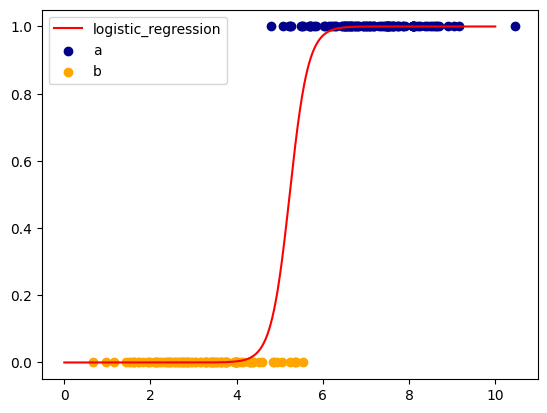

In [17]:
plt.plot(x_theorique,sigmoid(X=x_theorique,intercept=res.at[0,'coef'],coef=res.at[1,'coef']), label='logistic_regression',c='red')
plt.scatter(x=X_a, y=Cat_a,c='darkblue',label='a')
plt.scatter(x=X_b, y=Cat_b,c='orange',label='b')
plt.legend()
plt.show()

## régression logistique multiple (binaire)
- comme pour la régression linéaire, on peut avoir plusieurs variables explicatives (features)
    - $P(y=1) = F(X) = \frac{1}{1+e^{-(a + \sum_{k=1}^K b_k x_k)}}$
    - $\ln{(\frac{P(y)}{1-P(y)} )} = a + \sum_{k=1}^K b_k x_k$

## [regression logistique multinomiale](https://en.wikipedia.org/wiki/Multinomial_logistic_regression)
- régression logistique multi-classes, régression softmax
- EN: multinomial logistic regression, multi-class logistic regression, softmax regression

- Au lieu d'avoir une classification binaire $\{0,1\}$, on a une classification multinomiale/multi-classes $\{1,2,...,m,...,M\}$
    - pour généraliser le modèle, il faut prendre comme hypothèse que le probabilité est proportionnel à une fontion linéaire dans une exponentiel
        - $\forall m: P(y=m) \sim e^{-(a_m + \sum_{k=1}^K b_{k,m} x_k)}$
        - note: les paramètres $a_m,b_{k,m}$ peuvent être différents pour chaque $m$. Donc, pour chaque $m$ on a une fonction linéaire différente !
    - altérnativement: le logarithme de la probabilité est proportionnel à une fonction linéaire
        - $\forall m: \ln (P(y=m)) \sim -(a_m + \sum_{k=1}^K b_{k,m} x_k)$

    - on sait que la somme des proba vaut $1$: on peut donc déterminer un facteur de normalisation $Z$
        - $Z = \sum_{m=1}^{M} e^{-(a_m + \sum_{k=1}^K b_{k,m} x_k)}$
        - $\forall m : P(y=m) = \frac{1}{Z}e^{-(a_m + \sum_{k=1}^K b_{k,m} x_k)}$

        - la fonction avec les ratio d'exponentielles $\frac{e^{-x_i}}{\sum e^{-x_i}}$ s'appelle la ["softmax"](https://en.wikipedia.org/wiki/Softmax_function)
